##Libs

In [26]:
import graphviz
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor
from sklearn.preprocessing import  StandardScaler
import pandas as pd
from sklearn import tree
import numpy as np
import sys


import warnings
warnings.filterwarnings('ignore')

##Load dataset

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

##Decition Tree

In [3]:
trees={
    "DecisionTreeClassifier":DecisionTreeClassifier, #based on entropy reduction
    "DecisionTreeRegressor":DecisionTreeRegressor,
}

In [25]:
class Tree():
    def __init__(self,
                 dataset,
                 random_state=0,
                 tree_type="DecisionTreeClassifier",
                 criterion="entropy",
                 ):

        self.dataset = dataset
        self._setVectors()

        try:
            self.model = trees.get(tree_type)(random_state=random_state,
                                             criterion=criterion
                                            )
            self.model.fit(self.X,self.Y)
        except:
             sys.exit('Some error')

    def _setVectors(self):
        self.X=[np.array(value[:-1]) for value in self.dataset]
        self.Y=[np.array(value[-1]) for value in self.dataset]

        #scaler=StandardScaler()
        #self.X=scaler.fit_transform(self.X)

    def plot_tree(self,feature_names,class_names):
        dot_data=tree.export_graphviz(self.model,
                                      out_file=None,
                                      feature_names=feature_names,
                                      class_names=class_names)
        graph=graphviz.Source(dot_data)
        return graph

    def getPredict(self,X):
        return self.model.predict(X)


In [27]:
from sklearn.model_selection import train_test_split
def accuracy_tree(dataset,test_sample=30, tree_type="DecisionTreeClassifier",criterion="entropy"):

    X=dataset.data
    Y=dataset.target
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=test_sample)
    train_dataset=np.hstack((X_train,np.resize(Y_train,(len(Y_train),1))))

    predict=Tree(train_dataset, tree_type=tree_type,criterion=criterion)

    graph=predict.plot_tree(dataset.feature_names,dataset.target_names)

    answer=predict.getPredict(X_test)
    accuracy=sum(int(x == y) for (x, y) in zip(answer,Y_test))

    return graph,accuracy*100/len(X_test)

In [28]:
graph,accuracy=accuracy_tree(iris,test_sample=30, tree_type="DecisionTreeClassifier",criterion="entropy")

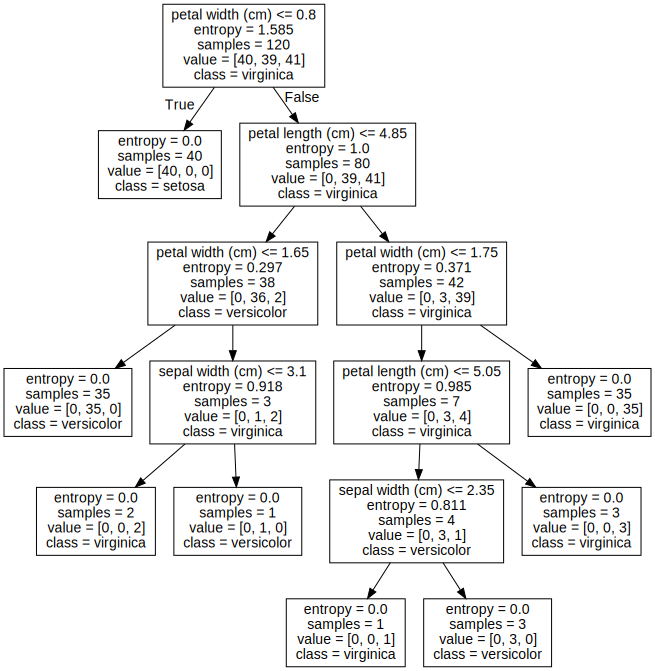

In [29]:
graph

In [30]:
graph,accuracy=accuracy_tree(iris,test_sample=30, tree_type="DecisionTreeRegressor",criterion="mse")

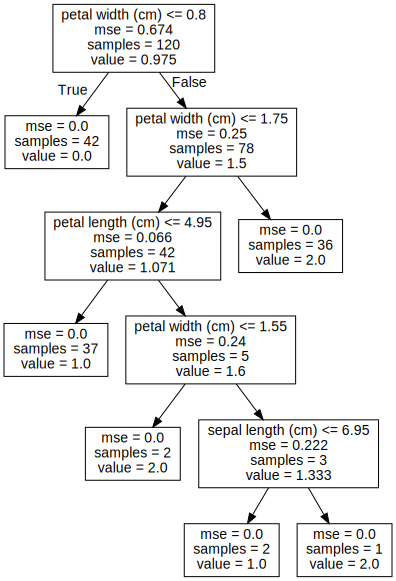

In [31]:
graph

##Random Forest

In [32]:
forests={
    "RandomForestClassifier":RandomForestClassifier, #based on entropy reduction
    "RandomForestRegressor":RandomForestRegressor,
}

In [33]:
class Forest(Tree):
    def __init__(self,
                 dataset,
                 random_state=0,
                 tree_type="RandomForestClassifier",
                 criterion="entropy",
                 max_features="sqrt",
                 bootstrap=True,
                 n_estimators=100,
                 ):

        self.dataset = dataset
        self._setVectors()

        try:
            self.model = forests.get(tree_type)(random_state=random_state,
                                                criterion=criterion,
                                                max_features=max_features,
                                                bootstrap=bootstrap,
                                                n_estimators=n_estimators,
                                            )
            self.model.fit(self.X,self.Y)
        except:
             sys.exit('Some error')


In [36]:
from sklearn.model_selection import train_test_split
def accuracy_forest(dataset,test_sample=0.2, tree_type="RandomForestClassifier",criterion="entropy",
                 max_features="sqrt",bootstrap=True,n_estimators=100,):

    X=dataset.data
    Y=dataset.target
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=test_sample)
    train_dataset=np.hstack((X_train,np.resize(Y_train,(len(Y_train),1))))

    predict=Forest(train_dataset, tree_type=tree_type,criterion=criterion,
                   max_features=max_features,bootstrap=bootstrap,n_estimators=n_estimators,)
    #predict.plot_tree(dataset.feature_names,dataset.target_names)
    #sys.exit()

    
    answer=predict.getPredict(X_test)
    accuracy=sum(int(x == y) for (x, y) in zip(answer,Y_test))

    return accuracy*100/len(X_test)


In [37]:
accuracy_forest(iris,tree_type="RandomForestClassifier")

96.66666666666667

##boosting

In [ ]:
boost={
    "AdaBoostRegressor":AdaBoostRegressor, #based on entropy reduction
    "AdaBoostClassifier":AdaBoostClassifier,
}

In [ ]:
class Boosting(Tree):
    def __init__(self,
                 dataset,
                 random_state=0,
                 tree_type="AdaBoostClassifier",
                 n_estimators=50,
                 loss="linear",
                 learning_rate=1.0,#float, default=1.0
                 #{‘linear’, ‘square’, ‘exponential’}, default=’linear’
                 ):

        self.dataset = dataset
        self._setVectors()

        #try:
        self.model = boost.get(tree_type)(random_state=random_state,
                                              n_estimators=n_estimators,
                                              learning_rate=learning_rate,
                                              loss=loss
                                              )
        self.model.fit(self.X,self.Y)
        #except:
            #sys.exit()



In [ ]:
from sklearn.model_selection import train_test_split
def accuracy_boosting(dataset,test_sample=0.2, tree_type="AdaBoostRegressor",
                 n_estimators=50,loss="linear",learning_rate=1.0,):

    X=dataset.data
    Y=dataset.target
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=test_sample)
    train_dataset=np.hstack((X_train,np.resize(Y_train,(len(Y_train),1))))

    predict=Boosting(train_dataset, tree_type=tree_type,n_estimators=n_estimators,
                   loss=loss,learning_rate=learning_rate,)
    #predict.plot_tree(dataset.feature_names,dataset.target_names)
    #sys.exit()

    answer=predict.getPredict(X_test)
    accuracy=sum(int(x == y) for (x, y) in zip(answer,Y_test))

    return accuracy*100/len(X_test)

In [ ]:
accuracy_boosting(iris,tree_type="AdaBoostRegressor")

86.66666666666667